In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import ipywidgets as widgets

In [2]:
cars93 = pd.read_csv(r"C:\Training\Academy\Statistics (Python)\Datasets\Cars93.csv")
cars93.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


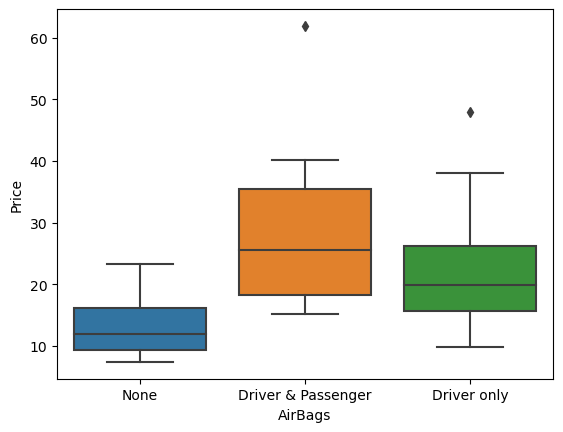

In [3]:
sns.boxplot(x='AirBags', y='Price', data=cars93)
plt.show()

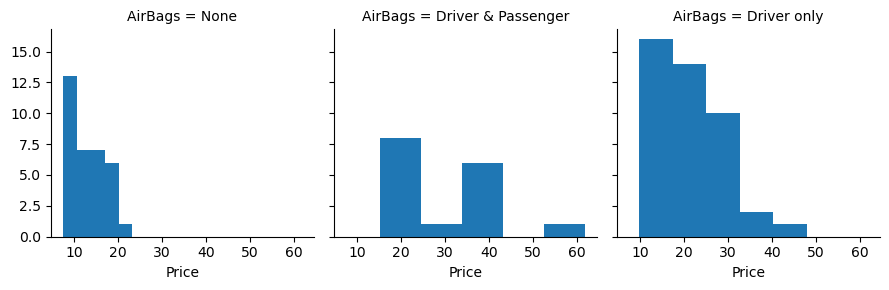

In [4]:
g = sns.FacetGrid(cars93, col="AirBags")
g = g.map(plt.hist, "Price", bins=5)
plt.show()

In [5]:
cars93['Price'].skew()

1.53308185621344

In [6]:
cars93['Price'].kurtosis()

3.429122585617559

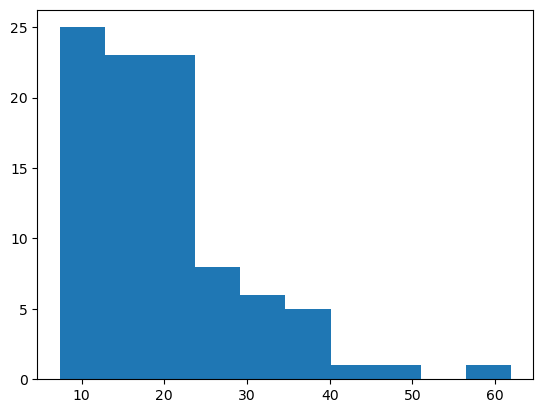

In [7]:
plt.hist(cars93['Price'])
plt.show()

In [8]:
def boxplot(var, category):
    sns.boxplot(x=category, y=var, data=cars93)
    plt.show()

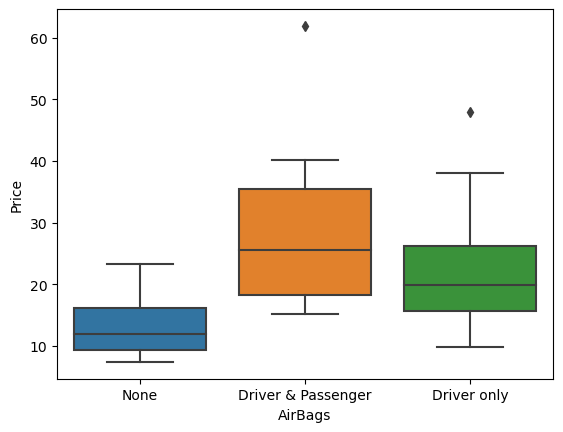

In [9]:
boxplot(var="Price", category="AirBags")

## Using Widgets

In [10]:
widgets.interact(boxplot,var=["Price","MPG.city","MPG.highway","Horsepower","EngineSize"], 
                category=["AirBags","Origin","DriveTrain","Man.trans.avail"])

interactive(children=(Dropdown(description='var', options=('Price', 'MPG.city', 'MPG.highway', 'Horsepower', '…

<function __main__.boxplot(var, category)>

In [11]:
def histogram(var, bins):
    plt.hist(var, bins, data=cars93)
    plt.show()

In [12]:
widgets.interact(histogram,var=["Price","MPG.city","MPG.highway","Horsepower","EngineSize"],
                bins=(5,25,5))

interactive(children=(Dropdown(description='var', options=('Price', 'MPG.city', 'MPG.highway', 'Horsepower', '…

<function __main__.histogram(var, bins)>

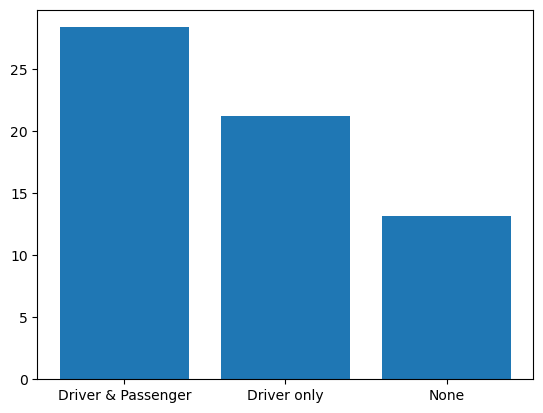

In [13]:
def groupby_bar(var, category):
    cts = cars93.groupby(category)[var].mean()
    plt.bar(cts.index,cts)
    plt.show()
groupby_bar('Price', 'AirBags')

In [14]:
widgets.interact(groupby_bar, var=["Price","MPG.city","MPG.highway","Horsepower","EngineSize"], 
                category=["AirBags","Origin","DriveTrain","Man.trans.avail","Type"])

interactive(children=(Dropdown(description='var', options=('Price', 'MPG.city', 'MPG.highway', 'Horsepower', '…

<function __main__.groupby_bar(var, category)>

Pie Chart

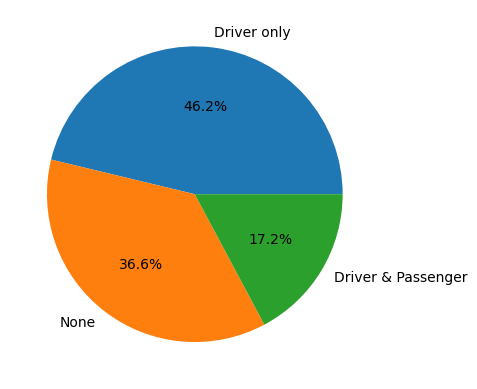

In [15]:
cts = cars93['AirBags'].value_counts()
plt.pie(cts,labels=cts.index,autopct='%1.1f%%')
plt.show()

In [16]:
def pie(category):
    cts = cars93[category].value_counts()
    plt.pie(cts,labels=cts.index,autopct='%1.1f%%')
    plt.show()

In [17]:
widgets.interact(pie, category=["AirBags","Origin","DriveTrain","Man.trans.avail","Type"])

interactive(children=(Dropdown(description='category', options=('AirBags', 'Origin', 'DriveTrain', 'Man.trans.…

<function __main__.pie(category)>